<a href="https://colab.research.google.com/github/husam1986/RAN_Chest_x_ray/blob/main/MyTest_Vit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Husam Imad**
new code for vit 

ref:
https://keras.io/examples/vision/image_classification_with_vision_transformer/

https://github.com/husam1986/RAN_Chest_x_ray

https://www.kaggle.com/code/ankan1998/covid19-detection-using-tensorflow-from-chest-xray


In [ ]:
!pip install -U tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 44.7 MB/s eta 0:00:00


intialize

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


1-  Configure the hyperparameters


In [ ]:
num_classes = 3
input_shape = (256, 256, 3)

learning_rate = 0.0001
weight_decay = 0.0001
batch_size = 256
num_epochs = 20
image_size = 256  # We'll resize input images to this size
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 128]  # Size of the dense layers of the final classifier

4-1 hardwer info

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

  from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')


  
print("TF version: ",tf.__version__)
print("Keras version:",tf.keras.__version__)

Sat Jun  3 04:22:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Extracting Files

In [ ]:
c = '/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/COVID/images'
n = '/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/Normal/images'
p = '/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/Viral Pneumonia/images'

In [ ]:
import random
import os
random.seed(42)
filenames = os.listdir(c) + os.listdir(n) + os.listdir(p)


Classes

0 -> Normal

1 -> Viral Pneumonia

2 -> COVID

In [ ]:
categories = []
for filename in filenames:
    """fileLastname = filename.split('/')[-1:][0]"""
    category = filename.split('-')[0]
    if category == 'COVID':
        categories.append(str(2))
    elif category == 'Viral Pneumonia':
        categories.append(str(1))
    elif category == 'Normal':
        categories.append(str(0))
    else: print(filename)

Converting to Dataframe

In [ ]:
import pandas as pd

from posix import remove

for i in range(len(filenames)):
    if 'COVID' in filenames[i]:
        filenames[i] = os.path.join(c, filenames[i])
    elif 'Viral Pneumonia' in filenames[i]:
        filenames[i] = os.path.join(p, filenames[i])
    elif 'Normal' in filenames[i]:
        filenames[i] = os.path.join(n, filenames[i])
    else: print(filenames[i])

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
"""df = df_t.sample(frac=1)"""

df.head()

,filename,category
0,/content/drive/Othercomputers/Hp8570/GoogleDri...,2
1,/content/drive/Othercomputers/Hp8570/GoogleDri...,2
2,/content/drive/Othercomputers/Hp8570/GoogleDri...,2
3,/content/drive/Othercomputers/Hp8570/GoogleDri...,2
4,/content/drive/Othercomputers/Hp8570/GoogleDri...,2



Exploratory Data Analysis

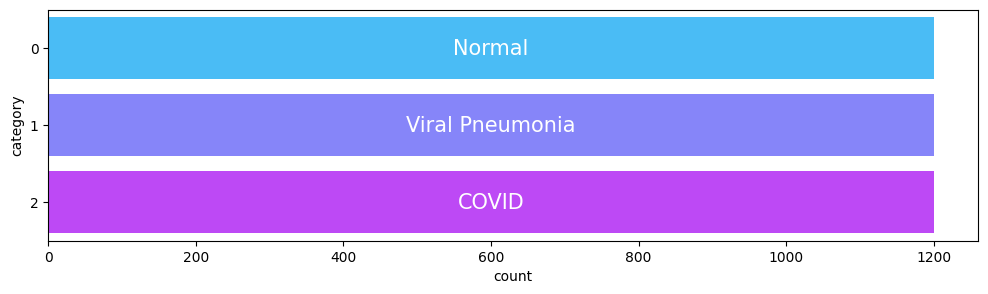

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,3))
splot = sns.countplot(data = df.sort_values(by='category'), y ='category', palette='cool', saturation=0.9)
plt.bar_label(container=splot.containers[0], 
              labels=['Normal', 'Viral Pneumonia', 'COVID'], 
              label_type='center', size=15, color='w')
plt.show()

Data Visualization

/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-200.png


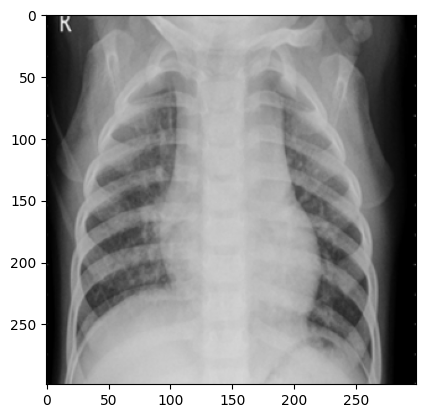

/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/COVID/images/COVID-340.png


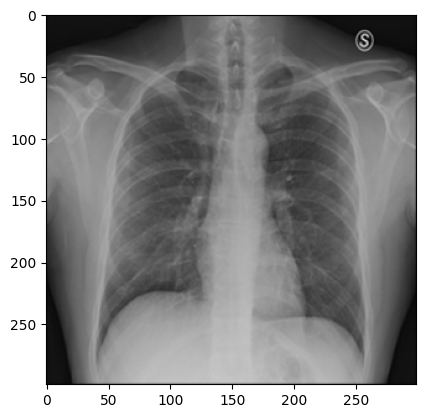

/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/COVID/images/COVID-1432.png


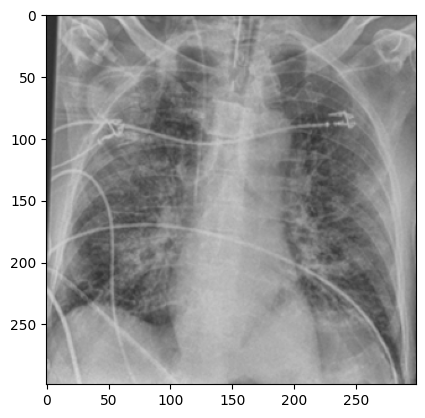

/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-948.png
/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/COVID/images/COVID-1380.png
/content/drive/Othercomputers/Hp8570/GoogleDrive_Hp8570/AI Work/COVID-19 Radiography Database/COVID-19_Radiography_Dataset/COVID/images/COVID-101.png


In [ ]:
import skimage.transform
from tensorflow.keras.preprocessing.image import load_img

sample = random.choice(df['filename'])
image = load_img(sample)
print(sample)
plt.imshow(image)
plt.show()
sample = random.choice(df['filename'])
image = load_img(sample)
print(sample)
plt.imshow(image)
plt.show()
sample = random.choice(df['filename'])
image = load_img(sample)
print(sample)
plt.imshow(image)
plt.show()

sample = random.choice(df['filename'])
print(sample)
sample = random.choice(df['filename'])
print(sample)
sample = random.choice(df['filename'])
print(sample)


Splitting Train, Validation & Test Data

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_valid_data = train_test_split(df, test_size=0.2, random_state = 42, shuffle=True, stratify=df['category'])
train_data = train_data.reset_index(drop=True)
test_valid_data = test_valid_data.reset_index(drop=True)

test_data, valid_data = train_test_split(test_valid_data, test_size=0.5, random_state = 42,
                                         shuffle=True, stratify=test_valid_data['category'])
test_data = test_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [ ]:
train_generator = train_data_gen.flow_from_dataframe(
    train_data, 
    x_col='filename',
    y_col='category',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=256
)

Found 2880 validated image filenames belonging to 3 classes.


In [ ]:
valid_data_gen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_data_gen.flow_from_dataframe(
    valid_data, 
    x_col='filename',
    y_col='category',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=256
)

Found 360 validated image filenames belonging to 3 classes.


Use data augmentation


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Cmpute the mean and the variance of the training data for normalization.

"""data_augmentation.layers[0].adapt(train_data)"""

'data_augmentation.layers[0].adapt(train_data)'

2- MLP

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

*3*- Implement patch creation as a layer


In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

4- display patches for a sample image

ValueError: ignored

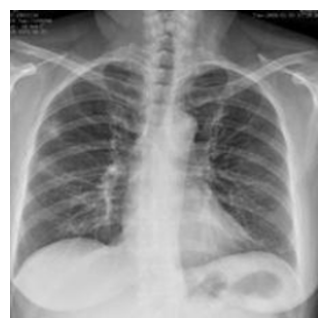

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
sample = random.choice(df['filename'])
image = load_img(sample)
"""image = x_train[np.random.choice(range(x_train.shape[0]))]"""
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

Implement the patch encoding layer


In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


Build the ViT model


In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

Compile, train, and evaluate the mode


In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        batch_size=batch_size,
        epochs=num_epochs,
        
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
   # evaluation
    val_scores = model.evaluate_generator(valid_generator, verbose=0)
    """test_scores = model.evaluate_generator(test_generator, verbose=1)"""
    print('validation loss:', val_scores[0])
    print('validation accuracy:', val_scores[1])
    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 256, 256, 3)  7          ['input_1[0][0]']                
                                                                                                  
 patches (Patches)              (None, None, 768)    0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 256, 64)      65600       ['patches[0][0]']            

Saving Model

In [ ]:
"""model.save('Covid.h5')"""

Plotting

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, num_epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, num_epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


9-Performance Analysis


In [ ]:
%load_ext tensorboard
%tensorboard --logdir Logs/


Model Testing

In [ ]:
sample = random.choice(test_data['filename'])

fileLastname = sample.split('/')[-1:][0]
category = fileLastname.split('-')[0]
true = ''
if category == 'COVID':
    true = 'COVID'
elif category == 'Viral Pneumonia':
    true = 'Viral Pneumonia'
elif category == 'Normal':
    true = 'Normal'

print(f'True value is : {true}')
    
image = load_img(sample, target_size=(256, 256))
img = img_to_array(image)
img = img.reshape((1, 256, 256, 3))
img=img.astype('float32')/ 255.0

result = model.predict(img)
print(result)
result = np.argmax(result, axis=-1)
print('Prediction is:')
if result == 0:
    print("Normal")
elif result == 1:
    print("Viral Pneumonia")
elif result == 2:
    print("COVID +", result)
else:
  print("none")
plt.imshow(image)
